#Artifical Neural Network
Artificial Neural Networks (A-NN) are computational models inspired by an animal’s central nervous systems which when presented as systems of interconnected “neurons” can compute values from inputs, perform machine learning and pattern recognition.

##Setup

*   Ensure the code works seamlessly both in Python 2 and 3
*   Import the common modules as always
*   Import MatplotLib and set parameters for plotting the activation functions
*   Define a function to save the plotted figures

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
IMAGES_PATH = "C:/Users/featg/Downloads/Python Files/"

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

##Activation Functions

Define activation functions for Sigmoid, ReLu, Leaky ReLu (alpha = 0.01 and 0.2) and their derivatives.
    
    The main purpose of activation function is to convert an input signal of a node in a A-NN to an output signal. If we do not apply an activation function to a A-NN, it would just be a linear regression model with limited power. The activation function introduces non-linear properties to A-NN which enables to use deep learning techniques to handle complicated datasets with hidden layers.



In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)
  
def leaky_relu_1(z, alpha=0.01):
    return np.maximum(alpha*z, z)
  
def leaky_relu_2(z, alpha=0.2):
    return np.maximum(alpha*z, z)

def derivative_leaky_relu_1(z,alpha=0.01):
    dz=np.ones_like(z)
    dz[z<0]=alpha
    return dz
  
def derivative_leaky_relu_2(z,alpha=0.2):
    dz=np.ones_like(z)
    dz[z<0]=alpha
    return dz

###Line Plots

Plot activation functions such as Step, Sigmoid, Tanh, ReLu, Leaky ReLu (alpha = 0.01 and 0.2) and their derivatives in two sub plots.

Saving figure activation_functions_plot


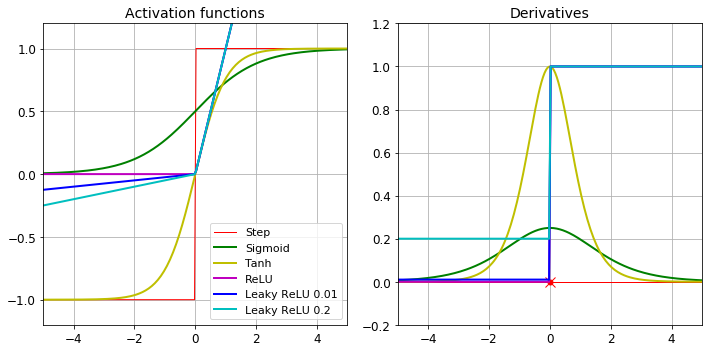

In [3]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g-", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "y-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-", linewidth=2, label="ReLU")
plt.plot(z, leaky_relu_1(z, 0.025), "b-", linewidth=2, label="Leaky ReLU 0.01")
plt.plot(z, leaky_relu_2(z, 0.05), "c-", linewidth=2, label="Leaky ReLU 0.2")
plt.grid(True)
plt.legend(loc="lower right", fontsize=11)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g-", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "y-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-", linewidth=2, label="ReLU")
plt.plot(z, derivative_leaky_relu_1(z,0.01), "b-", linewidth=2, label="Leaky ReLU 0.01")
plt.plot(z, derivative_leaky_relu_2(z,0.2), "c-", linewidth=2, label="Leaky ReLU 0.2")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

Define Heaviside function which is a derivative of Step function.

In [0]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

###Contour Plots

Create contour plots for Heaviside and Sigmoid functions.

    Contour plots are used to depict functions with a two-dimensional input and a one-dimensional output.

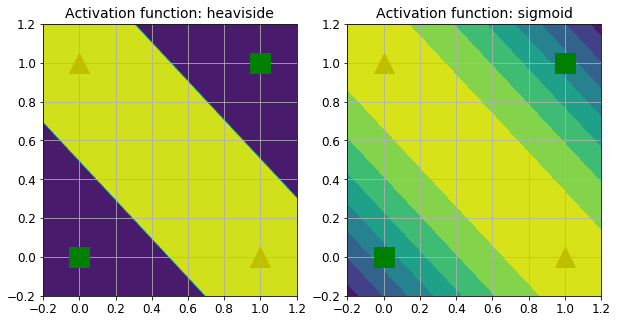

In [5]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

##Dataset

*   Import tensorflow module
*   Load the image dataset
*   Reshape the images into 28x28 pixels in NumPy arrays

        Each image has a RGB value ranging from 0 to 255.

*   Convert the values to float and normalize them by diving it by the maximum RGB value 255
*   Split 10 percent of the training datasets for creating validation datasets

        The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the the number of hidden units in a neural network and it helps to minimize overfitting.



In [0]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train_100 = X_train[:int(len(X_train)*0.1)], X_train[int(len(X_train)*0.1):]
y_valid, y_train_100 = y_train[:int(len(y_train)*0.1)], y_train[int(len(y_train)*0.1):]

##Training Functions

*shuffle_batch* function shuffles the dataset randomly to create batches.

    Shuffling the dataset reduces variance and prevents any bias and overfitting of models.

In [0]:
batch_size = 50

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

Define Leaky ReLu function with alphas as 0.1 for training the model.

In [0]:
def leaky_relu_3(z, name=None):
    return tf.maximum(0.1 * z, z, name=name)

Configure the number of nodes for input, hidden and output layers.

In [0]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

Create placeholders for feeding values to the tensorflow graph at a later stage.

In [0]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

Create dense layers using Leaky ReLu activation function and hidden layers to provide the outputs.

    Operation: outputs = activation(inputs * kernel + bias)

    Dense layer is a linear operation in which every input (image dataset) is connected to every output by a weight (kernel) followed by a non-linear activation function (Leaky ReLu).
    
    Hidden layer is hidden in between input and output layers performing computations on the weights and produces input which is then applied with activation functions to produce the actual output.
    
    Logits can be interpreted as yet to be normalised outputs of a model.

In [11]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu_3, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2,activation=leaky_relu_3, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


Apply softmax cross entropy with logits function.

    The softmax cross entropy with logits function is applied to the last dense layer in A-NN and uses cross-entropy as a loss function between logits and labels to measure the probability error during classification, compare the actual output of the end-to-end network with the desired training output and suggest the network to update its weights accordingly using an optimization algorithm. 


In [0]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

Construct a gradient descent optimizer.

    The gradient descent optimizer uses the output of softmax cross entropy with logits function to update the weights of the network accordingly.

In [0]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

Create a function to evaluate whether the outputs are in the top k predictions and compute the mean of the outputs.

In [0]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Define tf.global_variables_initializer(), for the variables to hold the values that were assigned to them and initialize the graph before training the model.

Define tf.train.Saver(), to save and restore the variables across various checkpoints.

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

##Train model with 100% training dataset size

*   Define epochs and batches
*   Train the model using a leaky ReLU activation function with alpha=0.1
*   Save the batch and validation accuracy values of the models in a file



In [16]:
n_epochs = 20
n_batches = 50
acc_valid_100 = [None]*n_epochs

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train_100, y_train_100, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch_100 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid_100[epoch] = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch_100, "Validation accuracy:", acc_valid_100[epoch])

    save_path = saver.save(sess, "./100_model_final.ckpt")

0 Batch accuracy: 0.92 Validation accuracy: 0.90316665
1 Batch accuracy: 0.94 Validation accuracy: 0.9203333
2 Batch accuracy: 0.96 Validation accuracy: 0.92966664
3 Batch accuracy: 0.96 Validation accuracy: 0.939
4 Batch accuracy: 0.96 Validation accuracy: 0.9435
5 Batch accuracy: 0.9 Validation accuracy: 0.9475
6 Batch accuracy: 0.96 Validation accuracy: 0.9508333
7 Batch accuracy: 0.96 Validation accuracy: 0.95233333
8 Batch accuracy: 0.9 Validation accuracy: 0.956
9 Batch accuracy: 0.94 Validation accuracy: 0.958
10 Batch accuracy: 0.96 Validation accuracy: 0.9611667
11 Batch accuracy: 0.92 Validation accuracy: 0.965
12 Batch accuracy: 0.92 Validation accuracy: 0.96433336
13 Batch accuracy: 0.98 Validation accuracy: 0.9675
14 Batch accuracy: 0.98 Validation accuracy: 0.96716666
15 Batch accuracy: 0.96 Validation accuracy: 0.9685
16 Batch accuracy: 0.98 Validation accuracy: 0.96816665
17 Batch accuracy: 0.98 Validation accuracy: 0.9698333
18 Batch accuracy: 0.94 Validation accuracy:

###Leaky ReLu vs Standard ReLu

Plot the validation accuracies between the models trained using Leaky ReLu and Standard ReLu.

([<matplotlib.axis.XTick at 0x7fae92a4e320>,
 <a list of 20 Text xticklabel objects>)

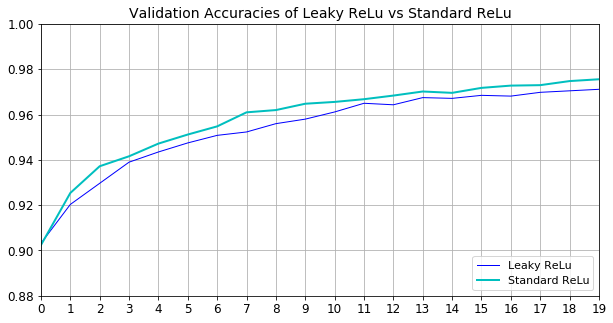

In [17]:
acc_valid_relu = [0.9024, 0.9254, 0.9372, 0.9416, 0.9472, 0.9512, 0.9548, 0.961, 0.962, 0.9648, 0.9656, 0.9668, 0.9684, 0.9702, 0.9696, 0.9718, 0.9728, 0.973, 0.9748, 0.9756]
epochs = list(range(0, 20))

plt.figure(figsize=(10,5))

plt.plot(epochs, acc_valid_100, "b-", linewidth=1, label="Leaky ReLu")
plt.plot(epochs, acc_valid_relu, "c-", linewidth=2, label="Standard ReLu")
plt.grid(True)
plt.legend(loc="lower right", fontsize=11)
plt.title("Validation Accuracies of Leaky ReLu vs Standard ReLu", fontsize=14)
plt.axis([0, 19, 0.88, 1])
plt.xticks(np.arange(0, 19+1, 1.0))

The validation accuracies of Standard ReLu are significantly better than Leaky ReLu. It might be due to the fact that Leaky ReLu requires larger neural networks with more neurons.

###Confusion Matrix

Using saver, restore to the checkpoint where accuracy values are provided in the file by the trained model, to obtain predicted values for the confusion matrix.

In [18]:
with tf.Session() as sess:
    saver.restore(sess, "./100_model_final.ckpt")
    Z = logits.eval(feed_dict={X: X_test})
    y_pred = np.argmax(Z, axis=1)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./100_model_final.ckpt


Provide a confusion matrix from the fully trained model and find the largest off-diagonal value.

    The largest off-diagonal value in the confusion matrix represents the greatest number of errors between two individual classes: y_test and y_pred.

In [19]:
from numpy import unravel_index

con_matrix_1 = tf.confusion_matrix(labels=y_test, predictions=y_pred)

with tf.Session():
    print('Confusion Matrix 1: \n\n', tf.Tensor.eval(con_matrix_1,feed_dict=None, session=None))
    con_matrix_2 = con_matrix_1.eval()
    np.fill_diagonal(con_matrix_2, 0)
    print("The largest off-diagonal value is", con_matrix_2.max(), unravel_index(con_matrix_2.argmax(),con_matrix_2.shape))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Confusion Matrix 1: 

 [[ 965    0    0    1    0    5    3    3    2    1]
 [   0 1119    3    1    0    1    4    1    6    0]
 [   6    1 1005    4    4    0    2    6    4    0]
 [   0    0    8  977    0    8    0    9    4    4]
 [   1    0    7    1  953    0    1    2    2   15]
 [   6    1    0   10    3  852    8    1    6    5]
 [   6    3    1    0    4    6  933    2    3    0]
 [   1    5   12    4    2    0    0  993    1   10]
 [   3    1    3   10    5    5    4    4  934    5]
 [   5    5    2    8   16    2    1    5    1  964]]
The largest off-diagonal value is 16 (9, 4)


###Tensorflow Graph
Define show_graph function to display the tensorflow graph of the model.

In [0]:
import numpy as np
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add()
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

 Provide a Unified Modelling Language (UML) graph representing the model.

In [21]:
import tensorflow as tf
show_graph(tf.get_default_graph())

##Train model with 50% training dataset size

*   Consider 50% of the original MNIST training set size
*   Define epochs and batches
*   Train the model using a leaky ReLU activation function with alpha=0.1
*   Save the batch and validation accuracy values of the models in a file



In [22]:
X_train_50 = X_train[:int(len(X_train)*0.5)]
y_train_50 = y_train[:int(len(y_train)*0.5)]
X_valid, X_train_50 = X_train[:int(len(X_train_50)*0.1)], X_train[int(len(X_train_50)*0.1):]
y_valid, y_train_50 = y_train[:int(len(y_train_50)*0.1)], y_train[int(len(y_train_50)*0.1):]

n_epochs = 20
n_batches = 50
acc_valid_50 = [None]*n_epochs

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train_50, y_train_50, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch_50 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid_50[epoch] = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch_50, "Validation accuracy:", acc_valid_50[epoch])
    save_path = saver.save(sess, "./50_model_final.ckpt")

0 Batch accuracy: 0.92 Validation accuracy: 0.904
1 Batch accuracy: 0.9 Validation accuracy: 0.92
2 Batch accuracy: 0.88 Validation accuracy: 0.9316667
3 Batch accuracy: 0.9 Validation accuracy: 0.9356667
4 Batch accuracy: 0.9 Validation accuracy: 0.94
5 Batch accuracy: 0.92 Validation accuracy: 0.9483333
6 Batch accuracy: 0.94 Validation accuracy: 0.9493333
7 Batch accuracy: 1.0 Validation accuracy: 0.953
8 Batch accuracy: 0.98 Validation accuracy: 0.9573333
9 Batch accuracy: 0.96 Validation accuracy: 0.95933336
10 Batch accuracy: 0.98 Validation accuracy: 0.959
11 Batch accuracy: 0.96 Validation accuracy: 0.963
12 Batch accuracy: 0.98 Validation accuracy: 0.9626667
13 Batch accuracy: 1.0 Validation accuracy: 0.96466666
14 Batch accuracy: 0.98 Validation accuracy: 0.96666664
15 Batch accuracy: 0.98 Validation accuracy: 0.9673333
16 Batch accuracy: 0.96 Validation accuracy: 0.9686667
17 Batch accuracy: 0.98 Validation accuracy: 0.96666664
18 Batch accuracy: 0.98 Validation accuracy: 0.

##Train model with 25% training dataset size

*   Consider 25% of the original MNIST training set size
*   Define epochs and batches
*   Train the model using a leaky ReLU activation function with alpha=0.1
*   Save the batch and validation accuracy values of the models in a file



In [23]:
X_train_25 = X_train[:int(len(X_train)*0.25)]
y_train_25 = y_train[:int(len(y_train)*0.25)]
X_valid, X_train_25 = X_train[:int(len(X_train_25)*0.1)], X_train[int(len(X_train_25)*0.1):]
y_valid, y_train_25 = y_train[:int(len(y_train_25)*0.1)], y_train[int(len(y_train_25)*0.1):]

n_epochs = 20
n_batches = 50
acc_valid_25 = [None]*n_epochs

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train_25, y_train_25, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch_25 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid_25[epoch] = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch_25, "Validation accuracy:", acc_valid_25[epoch])

    save_path = saver.save(sess, "./25_model_final.ckpt")

0 Batch accuracy: 0.92 Validation accuracy: 0.88666666
1 Batch accuracy: 0.9 Validation accuracy: 0.902
2 Batch accuracy: 0.98 Validation accuracy: 0.91466665
3 Batch accuracy: 0.96 Validation accuracy: 0.9213333
4 Batch accuracy: 0.94 Validation accuracy: 0.926
5 Batch accuracy: 0.98 Validation accuracy: 0.9393333
6 Batch accuracy: 0.98 Validation accuracy: 0.93733335
7 Batch accuracy: 0.9 Validation accuracy: 0.9406667
8 Batch accuracy: 0.96 Validation accuracy: 0.9433333
9 Batch accuracy: 0.92 Validation accuracy: 0.94533336
10 Batch accuracy: 0.96 Validation accuracy: 0.95133334
11 Batch accuracy: 0.96 Validation accuracy: 0.95066667
12 Batch accuracy: 0.96 Validation accuracy: 0.95133334
13 Batch accuracy: 0.96 Validation accuracy: 0.95666665
14 Batch accuracy: 0.96 Validation accuracy: 0.95533335
15 Batch accuracy: 0.98 Validation accuracy: 0.95533335
16 Batch accuracy: 0.96 Validation accuracy: 0.9626667
17 Batch accuracy: 1.0 Validation accuracy: 0.96466666
18 Batch accuracy: 0

##Validation accuracies over different training dataset sizes

Plot the validation accuracies for each epoch of the training, for 100%, 50% and 25% training set sizes.

([<matplotlib.axis.XTick at 0x7fae8e0e5ba8>,
 <a list of 20 Text xticklabel objects>)

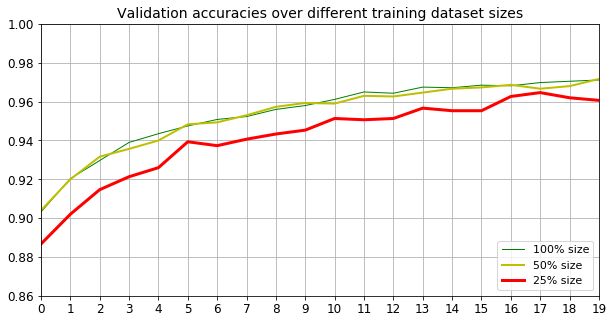

In [25]:
epochs = list(range(0, 20))

plt.figure(figsize=(10,5))

plt.plot(epochs, acc_valid_100, "g-", linewidth=1, label="100% size")
plt.plot(epochs, acc_valid_50, "y-", linewidth=2, label="50% size")
plt.plot(epochs, acc_valid_25, "r-", linewidth=3, label="25% size")
plt.grid(True)
plt.legend(loc="lower right", fontsize=11)
plt.title("Validation accuracies over different training dataset sizes", fontsize=14)
plt.axis([0, 19, 0.86, 1])
plt.xticks(np.arange(0, 19+1, 1.0))

The plot indicates that the validation accuracy increases as the size of the training dataset increases.

